In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from optimization.range.MethodSven import method_sven_iterations_list
from optimization.range.MethodSven import method_sven

from optimization.range.SearchDichotomous import search_method_dichotomous_iterations_list
from optimization.range.SearchDichotomous import search_dichotomous

from optimization.range.HalvingMethod import halving_method
from optimization.range.HalvingMethod import halving_method_iterations_list

from optimization.range.SearchGoldenSection import search_golden_section
from optimization.range.SearchGoldenSection import search_golden_section_iterations_list

from optimization.range.SearchPitchAdaptation import search_pitch_adaptation
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_list
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_label

In [3]:
x0 = 3.0
h = 2.0
n = 200

count_invoke = 0
f = lambda x: 20 * (x + 5).__pow__(2)
f_arr = lambda X: np.transpose([X, f(X)])

columns = ['x', 'y', 'h']
epsilon = 0.001
iter = 500

In [16]:
def print_iterations(iterations, f=None, range=None, columns=['x', 'y']):
    iterations = pd.DataFrame(iterations, columns=columns).reset_index(drop=True)
    if f is not None and range is not None:
        x = np.linspace(range[0], range[1])
        y = f(x)
        plt.plot(x, y)
    plt.plot(iterations['x'], iterations['y'])
    plt.plot([np.array(iterations['x'])[0], np.array(iterations['x'])[-1]],
             [np.array(iterations['y'])[0], np.array(iterations['y'])[-1]], 'y^')
    plt.show()
    return iterations


def print_with_sven(sven, starts, ends, start, end, f=None, range=None):
    if f is not None and range is not None:
        x = np.linspace(range[0], range[1])
        y = f(x)
        plt.plot(x, y)

    print('sven')
    print(sven)
    print('starts')
    print(starts)
    print('ends')
    print(ends)
    plt.plot(sven[0], sven[1], 'r-')
    plt.plot(starts[:, 0], starts[:, 1], color="blue")
    plt.plot(ends[:, 0], ends[:, 1], color="green")
    plt.plot(ends[:, 0], ends[:, 1], color="green")
    plt.plot([start[0], end[0]], [start[1], end[1]], 'y^')
    plt.show()


def concat_iter(arr0, arr1):
    arr0 = np.array(arr0)
    arr1 = np.array(arr1)
    columns = ['x', 'y', 'h']
    arr0 = pd.DataFrame(arr0[:, :3], columns=columns)
    arr1 = pd.DataFrame(arr1[:, :3], columns=columns)
    points = pd.concat([arr0, arr1])
    return points


def plot(X, Y):
    plt.plot(X, Y, 'r-')
    plt.plot()


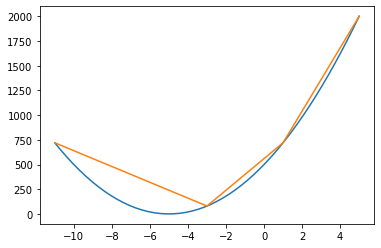

,x,y,h
0,5.0,2000.0,2.0
1,1.0,720.0,-2.0
2,-3.0,80.0,-4.0
3,-11.0,720.0,-8.0


In [64]:
nim = method_sven(x0, h, f, n)
print_iterations(method_sven_iterations_list, f=f, range=[-11, 5], columns=['x', 'y', 'h'])

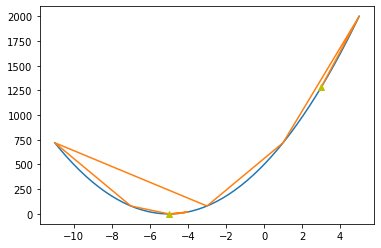

,x,y,h
0,3.000000,1.280000e+03,2.000000
1,5.000000,2.000000e+03,2.000000
2,1.000000,7.200000e+02,-2.000000
3,-3.000000,8.000000e+01,-4.000000
4,-11.000000,7.200000e+02,-8.000000
5,-7.000000,8.000000e+01,-11.000000
6,-5.000238,1.133787e-06,-7.000476
7,-4.000357,1.998572e+01,-5.000714
8,-4.500298,4.994049e+00,-5.000714
9,-4.750268,1.247323e+00,-5.000714


In [19]:
range = method_sven(x0, h, f, n)
result = search_dichotomous(f, range[1], range[0], epsilon=epsilon, iter=iter)

points = concat_iter(method_sven_iterations_list, search_method_dichotomous_iterations_list)
print_iterations(points, f=f, range=[-11,5],
                 columns=columns)

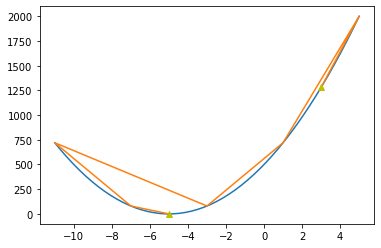

,x,y,h
0,3.0,1280.0,2.000000
1,5.0,2000.0,2.000000
2,1.0,720.0,-2.000000
3,-3.0,80.0,-4.000000
4,-11.0,720.0,-8.000000
5,-7.0,80.0,-11.000000
6,-5.0,0.0,-7.000000
7,-5.0,0.0,-6.000000
8,-5.0,0.0,-5.500000
9,-5.0,0.0,-5.250000


In [20]:
range = method_sven(x0, h, f, n)
result = halving_method(f, range[1], range[0], epsilon=epsilon, iter=iter)
points = concat_iter(method_sven_iterations_list, halving_method_iterations_list)
print_iterations(points, f=f, range=[-11,5],
                 columns=columns)

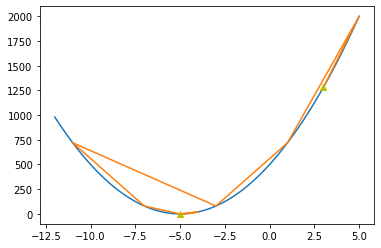

,x,y,h
0,3.000000,1.280000e+03,2.000000
1,5.000000,2.000000e+03,2.000000
2,1.000000,7.200000e+02,-2.000000
3,-3.000000,8.000000e+01,-4.000000
4,-11.000000,7.200000e+02,-8.000000
5,-7.000000,8.000000e+01,-11.000000
6,-5.000238,1.133787e-06,-7.000476
7,-4.000357,1.998572e+01,-5.000714
8,-4.500298,4.994049e+00,-5.000714
9,-4.750268,1.247323e+00,-5.000714


In [11]:
range = method_sven(x0, h, f, n)
result = search_dichotomous(f, range[1], range[0], epsilon=epsilon, iter=iter)

method_sven_iterations_list = np.array(method_sven_iterations_list)
search_method_dichotomous_iterations_list = np.array(search_method_dichotomous_iterations_list)

columns = ['x', 'y', 'h']
# start = pd.DataFrame(np.array([x0,f(x0),h]), columns=columns)
method_sven_iterations_list = pd.DataFrame(method_sven_iterations_list, columns=columns)
search_method_dichotomous_iterations_list = pd.DataFrame(search_method_dichotomous_iterations_list[:, :3],
                                                         columns=columns)
# points = pd.concat([method_sven_iterations_list, search_method_dichotomous_iterations_list])
points = pd.concat([method_sven_iterations_list, search_method_dichotomous_iterations_list])
print_iterations(points, f=f, range=[-12, 5],
                 columns=columns)

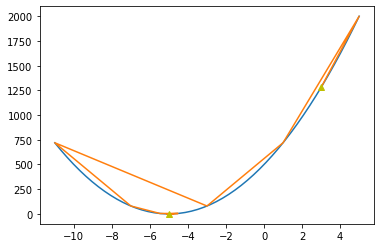

,x,y,h
0,3.000000,1.280000e+03,2.000000
1,5.000000,2.000000e+03,2.000000
2,1.000000,7.200000e+02,-2.000000
3,-3.000000,8.000000e+01,-4.000000
4,-11.000000,7.200000e+02,-8.000000
5,-7.000000,8.000000e+01,-11.000000
6,-5.472136,4.458247e+00,-7.944272
7,-4.527864,4.458247e+00,-6.055728
8,-5.111456,2.484496e-01,-6.055728
9,-4.750776,1.242248e+00,-5.334369


In [15]:
range = method_sven(x0, h, f, n)
result = search_golden_section(f, range[1], range[0], epsilon=epsilon, iter=iter)
points = concat_iter(method_sven_iterations_list, search_golden_section_iterations_list)
print_iterations(points, f=f, range=[-11,5], columns=columns)

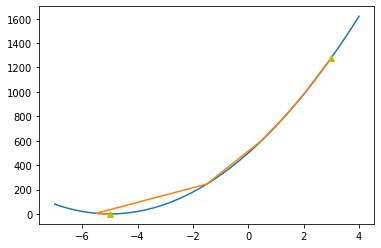

,x,y,step,step_coef,iter
0,3.000000,1280.000000,2.000000,0.00,499
1,3.000000,1280.000000,-1.000000,-0.50,498
2,2.000000,980.000000,-0.500000,0.50,497
3,1.500000,845.000000,-1.000000,2.00,496
4,0.500000,605.000000,-2.000000,2.00,495
5,-1.500000,245.000000,-4.000000,2.00,494
6,-5.500000,5.000000,-8.000000,2.00,493
7,-5.500000,5.000000,-2.000000,0.25,492
8,-5.500000,5.000000,1.000000,-0.50,491
9,-5.500000,5.000000,-0.500000,-0.50,490


In [13]:
res = search_pitch_adaptation(f, x0, h, epsilon=epsilon, iter=iter)
print_iterations(search_pitch_adaptation_iterations_list, f=f, range=[-7, x0 + 1],
                 columns=search_pitch_adaptation_iterations_label)